In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    final: int

In [3]:
def adder(state: AgentState) -> AgentState:
    """Adds num1 and num2 and stores the result in final."""
    state["final"] = state["num1"] + state["num2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtracts num2 from num1 and stores the result in final."""
    state["final"] = state["num1"] - state["num2"]
    return state

def decider(state: AgentState) -> AgentState:
    """Decides which operation to perform based on the value of operation."""
    if state["operation"] == "+":
        return "adder_edge"
    elif state["operation"] == "-":
        return "subtractor_edge"
    else:
        raise ValueError("Invalid operation")

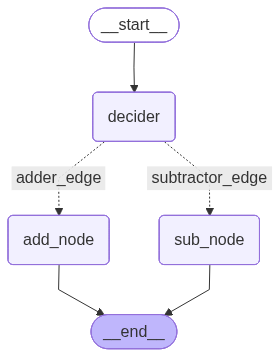

In [4]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)
graph.add_node("decider", lambda state:state)

graph.add_edge(START, "decider")
graph.add_conditional_edges(
    "decider",
    decider,
    {
        "adder_edge": "add_node",
        "subtractor_edge": "sub_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)
app = graph.compile()
app

In [5]:
result = app.invoke({"num1": 10, "num2": 5, "operation": "+"})
result["final"]

15